# BB84 protocol algorithm
Oleksandr Yasinskyi 150570

In [1]:
from qiskit import *

# Quantum circuit - coding on Alice's side

## Creating quantum, classical registers and a quantum circuit

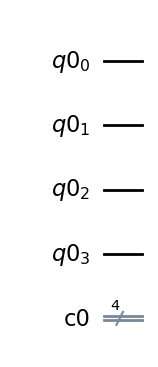

In [2]:
n0 = 4  # Number of qubits and bits
q0 = QuantumRegister(n0)  # Quantum register
c0 = ClassicalRegister(n0)  # Classical register
circuit0 = QuantumCircuit(q0, c0)  # Quantum algorithm - quantum circuit

circuit0.draw(output='mpl', style="iqp")  # Sketch of a quantum circuit

## Initializing the initial states of individual quantum registers

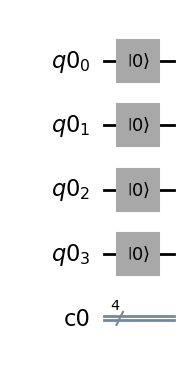

In [3]:
circuit0.reset([q0[0], q0[1], q0[2], q0[3]])  # Qubit state initialization "0"

circuit0.draw(output='mpl', style="iqp")  # Sketch of a quantum circuit

## Generation of random number xA

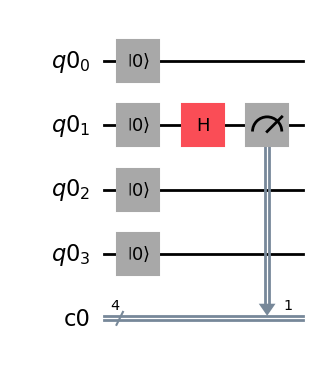

In [4]:
circuit0.h(q0[1])
circuit0.measure(q0[1], c0[1])

circuit0.draw(output='mpl', style="iqp")  # Sketch of a quantum circuit

## Generation of random number yA

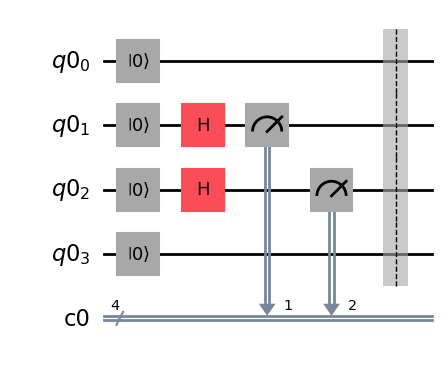

In [5]:
circuit0.h(q0[2])
circuit0.measure(q0[2], c0[2])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])

circuit0.draw(output='mpl', style="iqp")  # Sketch of a quantum circuit

## Information coding by Alice

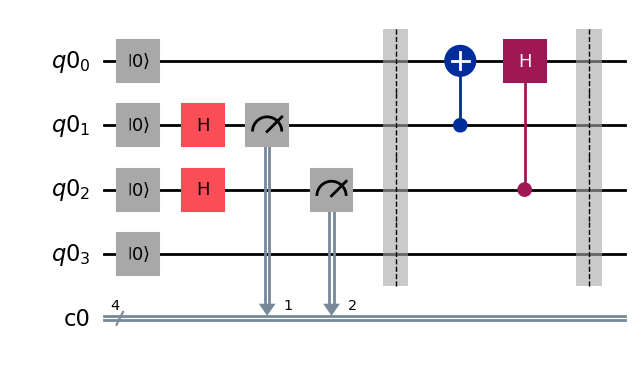

In [6]:
circuit0.cx(q0[1], q0[0])
circuit0.ch(q0[2], q0[0])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])

circuit0.draw(output='mpl', style="iqp")  # Sketch of a quantum circuit

# Quantum circuit - decoding on Bob's side

## Generation of random number yB

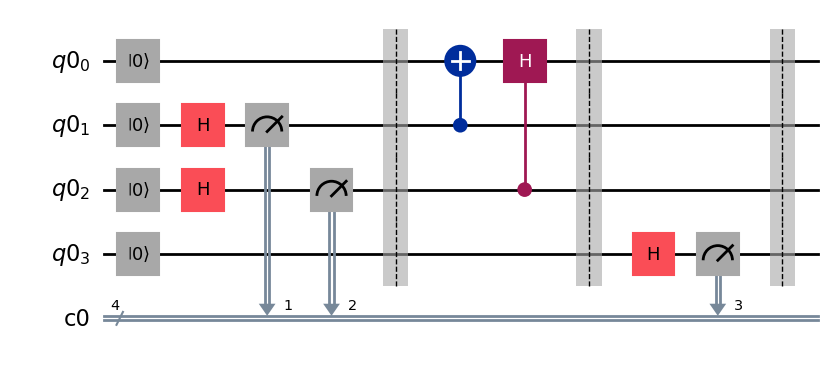

In [7]:
circuit0.h(q0[3])
circuit0.measure(q0[3], c0[3])
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])

circuit0.draw(output= 'mpl', style="iqp")  # Sketch of a quantum circuit

## Bob's decoding information

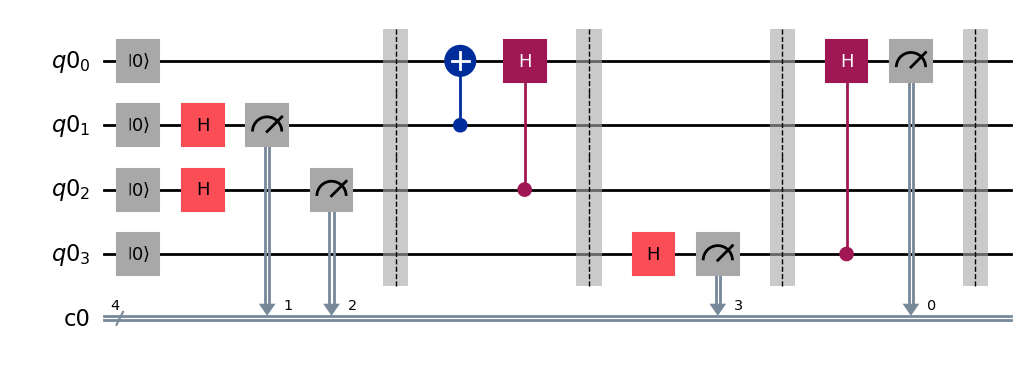

In [8]:
circuit0.ch(q0[3], q0[0])
circuit0.measure(q0[0], c0[0])  # Checking qubit states - quantum measurement on qubit "0„
circuit0.barrier(q0[0], q0[1], q0[2], q0[3])

circuit0.draw(output= 'mpl', style="iqp")  # Sketch of a quantum circuit

# Quantum circuit start-up and simulation

## Selecting a simulator and test run

In [9]:
# Selecting a quantum simulator
backend = BasicAer.get_backend('qasm_simulator')
# Performing quantum calculations
job_sim0 = execute(circuit0, backend, shots=1)
sim_result0 = job_sim0.result()
result = sim_result0.get_counts(circuit0)
# Numerical presentation of measurement results
print(result)

{'1100': 1}


## Generation of a sequence of numbers xB (including the remaining numbers)

In [10]:
sample=10
bit=[]
for kk in range(sample):
    job_sim0 = execute(circuit0, backend, shots=1)
    sim_result0 = job_sim0.result()
    result = sim_result0.get_counts(circuit0)
    xA = int(list(result.keys())[0][2])
    yA = int(list(result.keys())[0][1])
    xB = int(list(result.keys())[0][3])
    yB = int(list(result.keys())[0][0])
    print(result, "->", [xA, yA, yB, xB])
    bit.append([xA, yA, yB, xB])

{'1111': 1} -> [1, 1, 1, 1]
{'0110': 1} -> [1, 1, 0, 0]
{'0000': 1} -> [0, 0, 0, 0]
{'0000': 1} -> [0, 0, 0, 0]
{'1011': 1} -> [1, 0, 1, 1]
{'1100': 1} -> [0, 1, 1, 0]
{'1001': 1} -> [0, 0, 1, 1]
{'1111': 1} -> [1, 1, 1, 1]
{'0101': 1} -> [0, 1, 0, 1]
{'1111': 1} -> [1, 1, 1, 1]


In [11]:
print(bit)

[[1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 1]]


## Key sifting

In [12]:
keyA = []
keyB = []
for bb in bit:
    if bb[1]==bb[2]:
        keyA.append(bb[0])
        keyB.append(bb[3])
        print('yA=',bb[1], 'yB=',bb[2], '->', 'xA=',bb[0], ',xB=',bb[3])
print('keyA=', keyA)
print('keyB=', keyB)

yA= 1 yB= 1 -> xA= 1 ,xB= 1
yA= 0 yB= 0 -> xA= 0 ,xB= 0
yA= 0 yB= 0 -> xA= 0 ,xB= 0
yA= 1 yB= 1 -> xA= 0 ,xB= 0
yA= 1 yB= 1 -> xA= 1 ,xB= 1
yA= 1 yB= 1 -> xA= 1 ,xB= 1
keyA= [1, 0, 0, 0, 1, 1]
keyB= [1, 0, 0, 0, 1, 1]


In [13]:
keyA == keyB

True